In [2]:
%%capture
%pip install rasterio
%pip install pytorch_model_summary
import rasterio
import rasterio.plot
import os
import cv2
import numpy as np
from numpy import array as array
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pprint import pprint
from sklearn.model_selection import train_test_split
import torch

In [25]:
image_folder_path = 'c:/Users/finnl/Downloads/images'
# csv_path = 'c:/Users/finnl/Downloads/nigeria_mpi.csv'
csv_path = 'c:/Users/finnl/Downloads/burundi_combined_corrected_mpi.csv'
folder_path = 'c:/Users/finnl/Downloads/'


In [4]:
%ls 'c:/Users/finnl/Downloads/images'


Invalid switch - "Users".


In [26]:
df = pd.read_csv(csv_path)
df

,region,mpi,pop_in_mpi,deprivation_intensity,vulnerable_to_poverty,in_severe_poverty,pop_share,pop_size,num_mpi_poor,nutrition,child_mortality,years_of_schooling,school_attendance,cooking_fuel,sanitation,drinking_water,electricity,housing,assets
0,Bubanza,0.441545,78.610427,56.168817,14.757839,52.467071,4.856709,560.006531,440.223511,54.101958,8.004371,47.836350,24.350763,78.539326,53.611284,46.960313,75.976788,74.955655,61.858153
1,Bujumbura Mairie,0.113665,24.268078,46.837129,29.740326,9.638728,6.157891,710.040344,172.313141,17.023920,3.965573,9.609970,4.531294,23.903609,19.446212,7.919354,17.367017,14.082497,16.485511
2,Bujumbura Rural,0.342855,69.099075,49.617858,21.583638,33.701467,6.054747,698.147278,482.413300,48.531596,4.015276,27.136601,17.487452,69.099075,44.769437,32.530442,67.056448,61.701016,50.469453
3,Bururi,0.289831,60.369348,48.009568,26.459966,22.787346,3.311622,381.849091,230.519806,39.369021,4.512092,27.185472,11.951831,60.161314,20.536824,33.150180,59.569702,53.172322,46.049549
4,Cankuzo,0.461232,81.761344,56.411969,12.935615,55.393561,3.007225,346.750366,283.507751,55.957036,8.958656,51.803529,30.919311,81.756218,44.583448,53.147525,81.237876,77.318169,49.258467
5,Cibitoke,0.427891,77.493611,55.216351,16.160180,49.217703,5.870611,676.915283,524.566101,52.551568,9.598220,44.136369,28.986809,77.478521,42.519167,40.225444,73.893649,72.302205,57.966705
6,Gitega,0.393233,75.978417,51.755852,17.247683,41.747306,7.805024,899.964356,683.778687,48.005642,9.741094,36.237126,16.639653,75.615586,51.841202,46.729605,75.049950,72.775363,53.936729
7,Karusi,0.464934,82.700566,56.218997,14.002573,54.720902,5.217267,601.580933,497.510834,58.560211,6.655589,63.779479,29.180773,82.666617,15.499372,37.680068,82.270261,81.323308,62.913930
8,Kayanza,0.417104,77.978345,53.489663,15.177792,45.679507,7.163336,825.973938,644.080810,52.634181,5.960662,41.607384,25.103849,77.794307,52.314923,36.958913,76.391837,74.733658,56.674502
9,Kirundo,0.542976,90.102182,60.262299,8.694848,68.014777,7.186064,828.594666,746.581848,53.716563,14.037048,63.276117,40.195345,90.054350,76.916449,57.190111,89.579403,86.299782,63.642319


In [27]:
# cleaning dataset
df_numeric = df.loc[ : , df.columns != 'region']

df = df.applymap(lambda s : str(s).replace(",", ""))
df.loc[ : , df.columns != 'region'] =  df.loc[ : , df.columns != 'region'].applymap(lambda s : float(s))

print(len(df))

regions = df["region"]

# df = df.iloc[:2]

df.head()

18


,region,mpi,pop_in_mpi,deprivation_intensity,vulnerable_to_poverty,in_severe_poverty,pop_share,pop_size,num_mpi_poor,nutrition,child_mortality,years_of_schooling,school_attendance,cooking_fuel,sanitation,drinking_water,electricity,housing,assets
0,Bubanza,0.441545,78.610427,56.168817,14.757839,52.467071,4.856709,560.006531,440.223511,54.101958,8.004371,47.83635,24.350763,78.539326,53.611284,46.960313,75.976788,74.955655,61.858153
1,Bujumbura Mairie,0.113665,24.268078,46.837129,29.740326,9.638728,6.157891,710.040344,172.313141,17.02392,3.965573,9.60997,4.531294,23.903609,19.446212,7.919354,17.367017,14.082497,16.485511
2,Bujumbura Rural,0.342855,69.099075,49.617858,21.583638,33.701467,6.054747,698.147278,482.4133,48.531596,4.015276,27.136601,17.487452,69.099075,44.769437,32.530442,67.056448,61.701016,50.469453
3,Bururi,0.289831,60.369348,48.009568,26.459966,22.787346,3.311622,381.849091,230.519806,39.369021,4.512092,27.185472,11.951831,60.161314,20.536824,33.15018,59.569702,53.172322,46.049549
4,Cankuzo,0.461232,81.761344,56.411969,12.935615,55.393561,3.007225,346.750366,283.507751,55.957036,8.958656,51.803529,30.919311,81.756218,44.583448,53.147525,81.237876,77.318169,49.258467


In [28]:
def sample_images(rgb_image, num_sampled_images, image_length):
    len1, len2 = rgb_image.shape[0], rgb_image.shape[1]
    ys, xs = np.arange((len1 - image_length)//image_length), np.arange((len2 - image_length)//image_length)
    sampled_upper_left_corner_indices = set()
    while len(sampled_upper_left_corner_indices) < num_sampled_images:
        y = np.random.choice(ys) * image_length # corresponding to axis 0
        x = np.random.choice(xs) * image_length # corresponding to axis 1
        if (y, x) in sampled_upper_left_corner_indices:
            continue
        if np.isnan(rgb_image[y:y+image_length, x:x+image_length]).any():
            continue
        sampled_upper_left_corner_indices.add((y, x))
    
    samples = np.zeros((num_sampled_images, image_length, image_length))

    for i, sample in enumerate(sampled_upper_left_corner_indices):
        samples[i] = rgb_image[y:y+image_length, x:x+image_length].copy()
    
    return samples

In [41]:
image_length = 40 # each sampled image is image_length by image_length
num_images_per_region = 24

In [30]:
from torch.nn import Conv2d, MaxPool2d, Flatten, Linear
from torch.nn.functional import relu

from pytorch_model_summary import summary

from torch.utils.data import DataLoader, TensorDataset

class CNNRegressor(torch.nn.Module):
  def __init__(self):
    
    super(CNNRegressor, self).__init__()

    # define convolutional layers
    self.conv_layer1 = Conv2d(1, 8, kernel_size=4, stride=1) # 3 in-channels because of RGB image? nope, let's just do 1 for now
    self.maxpool1 = MaxPool2d(kernel_size=4, stride=2)
    self.conv_layer2 = Conv2d(8, 16, kernel_size=2, stride=2)
    self.maxpool2 = MaxPool2d(kernel_size=4, stride=2)
    self.flatten_layer = Flatten()
    self.linear_layer = Linear(5184, 10)
    self.output_layer = Linear(10, 1)
    self.double()

  # define the method to feed the inputs to the model
  def forward(self, input):
    input = input.double()
    output = relu(self.conv_layer1(input))
    output = relu(self.conv_layer2(output))
    output = self.flatten_layer(output)
    output = relu(self.linear_layer(output))
    output = self.output_layer(output)
    return output

print(summary(CNNRegressor(), torch.zeros((1, 1, image_length, image_length)), show_input=True))

-----------------------------------------------------------------------
      Layer (type)         Input Shape         Param #     Tr. Param #
          Conv2d-1      [1, 1, 40, 40]             136             136
          Conv2d-2      [1, 8, 37, 37]             528             528
         Flatten-3     [1, 16, 18, 18]               0               0
          Linear-4           [1, 5184]          51,850          51,850
          Linear-5             [1, 10]              11              11
Total params: 52,525
Trainable params: 52,525
Non-trainable params: 0
-----------------------------------------------------------------------


In [31]:
class LinearRegressor(torch.nn.Module):
  def __init__(self):
    
    super(LinearRegressor, self).__init__()
    self.output_layer = Linear(1600, 1)
    self.flatten_layer = Flatten()
    self.double()

  # define the method to feed the inputs to the model
  def forward(self, input):
    input = input.double()
    output = self.flatten_layer(input)
    output = self.output_layer(output)
    return output

print(summary(LinearRegressor(), torch.zeros((1, 1, image_length, image_length)), show_input=True))

-----------------------------------------------------------------------
      Layer (type)         Input Shape         Param #     Tr. Param #
         Flatten-1      [1, 1, 40, 40]               0               0
          Linear-2           [1, 1600]           1,601           1,601
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
-----------------------------------------------------------------------


In [5]:
%%capture
from torch.optim import Adam
from torch.nn import MSELoss

%pip install pytorch-ignite
from ignite.contrib.metrics.regression.r2_score import R2Score

In [32]:
def model_loss(model, dataset, train = False, optimizer = None):
  loss_fn = MSELoss()
  score_metric = R2Score()

  avg_loss = 0
  avg_score = 0
  count = 0

  all_outputs = []
  all_predictions = []

  for input, output in iter(dataset):
    # get predictions of the model for training set

    input = input.float()
    predictions = model(input)

    # calculate loss of the model
    loss = loss_fn(predictions, output)

    # compute the R2 score
    score_metric.update([predictions, output])
    try:
        score = score_metric.compute()
    except:
        score = 0

    if(train):
      # clear the errors
      optimizer.zero_grad()

      # compute the gradients for optimizer
      loss.backward()

      # use optimizer in order to update parameters
      # of the model based on gradients
      optimizer.step()

    # store the loss and update values
    avg_loss += loss.item()
    avg_score += score
    count += 1

    if not train:
      all_outputs.append(output.detach().numpy())
      all_predictions.append(predictions.detach().numpy())

  if train:
    return avg_loss/count, avg_score/count
  else:
    return avg_loss/count, avg_score/count, np.array(all_predictions).squeeze(), np.array(all_outputs).squeeze()

Shape von X: (432, 40, 40)
432 Bilder mit 40 Pixeln in der Höhe und 40 Pixeln in der Breite


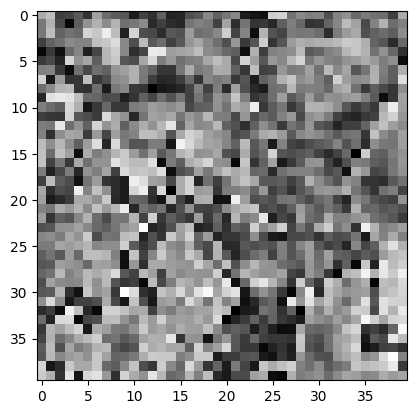

In [43]:
# ein paar tests mit dem X.npy array
import matplotlib.pyplot as plt
numpy_file_location = os.path.join(folder_path, "X_Burundi.npy")
# Laden der Datei
X = np.load(numpy_file_location)

# Größe und Form des Arrays anzeigen
print("Shape von X:", X.shape)
print(X.shape[0], 'Bilder mit', X.shape[1], 'Pixeln in der Höhe und', X.shape[2], 'Pixeln in der Breite')
# Einige Einträge aus dem Array anzeigen
# print(X[:5])  # Zeigt die ersten 5 Einträge (oder was auch immer Sie bevorzugen)

# Ein spezifisches Bild aus dem Array anzeigen (z.B. das erste Bild)
plt.imshow(X[100], cmap='gray')  # 'cmap' ist optional, je nach Art der Daten
plt.show()


In [44]:
# BIG for loop
labels_of_interest = ["mpi", "pop_in_mpi", "deprivation_intensity"] + ["nutrition", "child_mortality", "years_of_schooling", "school_attendance", "cooking_fuel", "sanitation", "drinking_water", "electricity", "housing", "assets"]

numpy_file_location = os.path.join(folder_path, "X_Burundi.npy")
cnn_results_files_location = os.path.join(folder_path, "results_cnn.npy")
lr_results_files_location = os.path.join(folder_path, "results_lr.npy")

with open(numpy_file_location, "rb") as f:
    X = np.load(f)
    loaded = True

print(X.shape)
print(y.shape)

for model_name, model in zip(["cnn", "lr"], [CNNRegressor(), LinearRegressor()]):
# for model_name, model in zip(["lr"], [LinearRegressor()]):
    train_predictions = {label_of_interest: [] for label_of_interest in labels_of_interest}
    test_predictions = {label_of_interest: [] for label_of_interest in labels_of_interest}
    train_responses = {label_of_interest: [] for label_of_interest in labels_of_interest}
    test_responses = {label_of_interest: [] for label_of_interest in labels_of_interest}
    train_mse = {label_of_interest: 0 for label_of_interest in labels_of_interest}
    test_mse = {label_of_interest: 0 for label_of_interest in labels_of_interest}
    train_r2 = {label_of_interest: 0 for label_of_interest in labels_of_interest}
    test_r2 = {label_of_interest: 0 for label_of_interest in labels_of_interest}
    results_predicted = {label_of_interest: [] for label_of_interest in labels_of_interest}
    results_actual = {label_of_interest: [] for label_of_interest in labels_of_interest}
    all_preds_labels = {label_of_interest: [] for label_of_interest in labels_of_interest}
    all_outputs_labels = {label_of_interest: [] for label_of_interest in labels_of_interest}

    for label_of_interest in labels_of_interest:

        regions = list(df["region"])
        region_indices = {region: i for i, region in enumerate(regions)}
        # print(region_indices)
        num_regions = len(regions)

        labels = {region: 0 for region in regions}
        for region in regions:
            labels[region] = df[df["region"] == region][label_of_interest]

        # X = np.zeros((num_regions * num_images_per_region, image_length, image_length))
        y = np.zeros(num_regions * num_images_per_region)

        for i, region in enumerate(regions):
            y[num_images_per_region * i : num_images_per_region * (i+1)] = labels[region]

        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=288)

        X_train = X_train[:, None, :, :]
        X_test = X_test[:, None, :, :]

        # convert the values of training set to the numpy array
        try:
            X_train_np = X_train.to_numpy()
            y_train_np = y_train.to_numpy()
        except:
            X_train_np = X_train
            y_train_np = y_train

        # convert the values of testing set to the numpy array
        try:
            X_test_np = X_test.to_numpy()
            y_test_np = y_test.to_numpy()
        except:
            X_test_np = X_test
            y_test_np = y_test

        if torch.cuda.is_available():
            model.cuda() # if GPU is available

        epochs = 100
        optimizer = Adam(model.parameters(), lr = 2e-5)

        if torch.cuda.is_available():
            train_inputs = torch.from_numpy(X_train_np).cuda().double()
            train_outputs = torch.from_numpy(y_train_np.reshape(y_train_np.shape[0],1)).cuda().double()
            test_inputs = torch.from_numpy(X_test_np).cuda().double()
            test_outputs = torch.from_numpy(y_test_np.reshape(y_test_np.shape[0],1)).cuda().double()
        else:
            train_inputs = torch.from_numpy(X_train_np)
            train_outputs = torch.from_numpy(y_train_np.reshape(y_train_np.shape[0],1))
            test_inputs = torch.from_numpy(X_test_np)
            test_outputs = torch.from_numpy(y_test_np.reshape(y_test_np.shape[0],1))

        tensor = TensorDataset(train_inputs, train_outputs)
        loader = DataLoader(tensor, batch_size=1, shuffle = True, drop_last = False)

        for epoch in range(epochs):
            avg_loss, avg_r2_score = model_loss(model, loader, train = True, optimizer = optimizer)
            if epoch % 20 == 0:
                print("Epoch " + str(epoch + 1) + ":\n\tLoss = " + str(avg_loss) + "\n\tR^2 Score = " + str(avg_r2_score))

        torch.save(model,  'c:/Users/finnl/Downloads/model-{}.pt'.format(label_of_interest))

        tensor = TensorDataset(train_inputs, train_outputs)
        loader = DataLoader(tensor, batch_size=1, shuffle = False, drop_last = True)

        train_avg_loss, train_avg_r2_score, train_preds, train_outputs = model_loss(model, loader, train=False)

        train_mse[label_of_interest] = train_avg_loss
        train_r2[label_of_interest] = train_avg_r2_score
        train_responses[label_of_interest] = train_outputs
        train_predictions[label_of_interest] = train_preds

        tensor = TensorDataset(test_inputs, test_outputs)
        loader = DataLoader(tensor, batch_size=1, shuffle = False, drop_last = True)

        # output of the performance of the model
        test_avg_loss, test_avg_r2_score, test_preds, test_outputs = model_loss(model, loader, train=False)

        test_mse[label_of_interest] = test_avg_loss
        test_r2[label_of_interest] = test_avg_r2_score
        test_responses[label_of_interest] = test_outputs
        test_predictions[label_of_interest] = test_preds

        print("The model's L2 loss is: " + str(avg_loss))
        print("The model's R^2 score is: " + str(avg_r2_score))

        # all predictions
        X_all = X.copy()[:, None, :, :]
        all_inputs = torch.from_numpy(X_all)
        all_outputs = torch.from_numpy(y.reshape(y.shape[0],1))

        tensor = TensorDataset(all_inputs, all_outputs)
        loader = DataLoader(tensor, batch_size=1, shuffle = False, drop_last = True)
        all_avg_loss, all_avg_r2_score, all_preds, all_outputs = model_loss(model, loader, train=False)
        
        result_predicted = {region: 0 for region in regions}
        result_actual = {region: 0 for region in regions}

        for i, region in enumerate(regions):
            predicted = all_preds[24*i:24*(i+1)].mean()
            actual = y[24*i:24*(i+1)].mean()
            result_predicted[region] = predicted
            result_actual[region] = actual

        results_predicted[label_of_interest] = result_predicted
        results_actual[label_of_interest] = result_actual
        all_preds_labels[label_of_interest] = all_preds
        all_outputs_labels[label_of_interest] = all_outputs

    if model_name == "cnn":
        with open(cnn_results_files_location, "wb") as f:
            np.save(f, train_mse)
            np.save(f, train_r2)
            np.save(f, train_responses)
            np.save(f, train_predictions)
            np.save(f, test_mse)
            np.save(f, test_r2)
            np.save(f, test_responses)
            np.save(f, test_predictions)
            np.save(f, results_actual)
            np.save(f, results_predicted)
            np.save(f, all_preds_labels)
            np.save(f, all_outputs_labels)
    elif model_name == "lr":
        with open(lr_results_files_location, "wb") as f:
            np.save(f, train_mse)
            np.save(f, train_r2)
            np.save(f, train_responses)
            np.save(f, train_predictions)
            np.save(f, test_mse)
            np.save(f, test_r2)
            np.save(f, test_responses)
            np.save(f, test_predictions)
            np.save(f, results_actual)
            np.save(f, results_predicted)
            np.save(f, all_preds_labels)
            np.save(f, all_outputs_labels)
    else:
        print("model name not found!!")

(432, 40, 40)
(432,)
Epoch 1:
	Loss = 0.9475186609654224
	R^2 Score = -139447.38181016358
Epoch 21:
	Loss = 0.004055811462274456
	R^2 Score = 1332.3463648433087
Epoch 41:
	Loss = 0.0007813393339891433
	R^2 Score = -134.39891288481792
Epoch 61:
	Loss = 0.0009595793764747533
	R^2 Score = -91.00120071495577
Epoch 81:
	Loss = 0.00042791079910623874
	R^2 Score = -4.291084042679716
The model's L2 loss is: 0.0007169059923674698
The model's R^2 score is: -321.9218976188028
Epoch 1:
	Loss = 4732.279783126097
	R^2 Score = 82017.83401312202
Epoch 21:
	Loss = 221.41188303597266
	R^2 Score = 92.26166123117721
Epoch 41:
	Loss = 196.47524725994796
	R^2 Score = -816.997551800772
Epoch 61:
	Loss = 169.2794431857732
	R^2 Score = 67.59541570003321
Epoch 81:
	Loss = 139.80220999436077
	R^2 Score = -788.2936818934677
The model's L2 loss is: 110.46515227949477
The model's R^2 score is: 36.81217510022536
Epoch 1:
	Loss = 58.22208688657957
	R^2 Score = -18216.77190443048
Epoch 21:
	Loss = 9.63936628332994
	R^

In [45]:
labels_of_interest = ["mpi", "pop_in_mpi", "deprivation_intensity"] + ["nutrition", "child_mortality", "years_of_schooling", "school_attendance", "cooking_fuel", "sanitation", "drinking_water", "electricity", "housing", "assets"]

In [48]:
from IPython.display import display

def mse(predicted, actual):
    return np.mean((predicted - actual)**2)

for model_name in ["lr", "cnn"]:
    if model_name == "lr":
        lr_results_files_location = os.path.join(folder_path, "results_lr.npy")
        with open(lr_results_files_location, "rb") as f:
            train_mse = np.load(f, allow_pickle=True)
            train_r2 = np.load(f, allow_pickle=True)
            train_responses = np.load(f, allow_pickle=True)
            train_predictions = np.load(f, allow_pickle=True)
            test_mse = np.load(f, allow_pickle=True)
            test_r2 = np.load(f, allow_pickle=True)
            test_responses = np.load(f, allow_pickle=True)
            test_predictions = np.load(f, allow_pickle=True)
            results_actual = np.load(f, allow_pickle=True)
            results_predicted = np.load(f, allow_pickle=True)
            all_preds_labels = np.load(f, allow_pickle=True)
            all_outputs_labels = np.load(f, allow_pickle=True)
    elif model_name == "cnn":
        cnn_results_files_location = os.path.join(folder_path, "results_cnn.npy")
        with open(cnn_results_files_location, "rb") as f:
            train_mse = np.load(f, allow_pickle=True)
            train_r2 = np.load(f, allow_pickle=True)
            train_responses = np.load(f, allow_pickle=True)
            train_predictions = np.load(f, allow_pickle=True)
            test_mse = np.load(f, allow_pickle=True)
            test_r2 = np.load(f, allow_pickle=True)
            test_responses = np.load(f, allow_pickle=True)
            test_predictions = np.load(f, allow_pickle=True)
            results_actual = np.load(f, allow_pickle=True)
            results_predicted = np.load(f, allow_pickle=True)
            all_preds_labels = np.load(f, allow_pickle=True)
            all_outputs_labels = np.load(f, allow_pickle=True)

    print(f"{model_name}")
    mpi_vals = np.array(list(results_actual[()]["mpi"].values()))

    print("direct_method")
    direct_method = np.array(list(results_predicted[()]["mpi"].values()))
    print(mse(direct_method, mpi_vals))
    display(direct_method)

    print("factor method, AF")
    factor_average_first = np.array(list(results_predicted[()]["pop_in_mpi"].values())) * np.array(list(results_predicted[()]["deprivation_intensity"].values())) / 10000
    print(mse(factor_average_first, mpi_vals))
    display(factor_average_first)

    print("factor method, AL")
    average_last_predictions = all_preds_labels[()]["pop_in_mpi"] * all_preds_labels[()]["deprivation_intensity"] / 10000
    factor_average_last = np.zeros(18)
    for i in range(18):
        for j in range(24):
            factor_average_last[i] = np.mean(average_last_predictions[24*i:24*(i+1)])

    print(mse(factor_average_last, mpi_vals))
    display(factor_average_last)

    print("components method, AF")
    components_average_first = np.zeros(18)
    for label in ["nutrition", "child_mortality", "years_of_schooling", "school_attendance"]:
        components_average_first += np.array(list(results_predicted[()][label].values()))/6
    for label in ["cooking_fuel", "sanitation", "drinking_water", "electricity", "housing", "assets"]:
        components_average_first += np.array(list(results_predicted[()][label].values()))/18
    components_average_first/=100

    print(mse(components_average_first, mpi_vals))
    display(components_average_first)

    print("components method, AL")
    average_last_component_predictions = np.zeros(432) # changed from 444 to 432
    for label in ["nutrition", "child_mortality", "years_of_schooling", "school_attendance"]:
        average_last_component_predictions += np.array(list(all_preds_labels[()][label]))/6
    for label in ["cooking_fuel", "sanitation", "drinking_water", "electricity", "housing", "assets"]:
        average_last_component_predictions += np.array(list(all_preds_labels[()][label]))/18
    average_last_component_predictions/=100

    components_average_last = np.zeros(18)
    for i in range(18):
        for j in range(24):
            components_average_last[i] = np.mean(average_last_component_predictions[24*i:24*(i+1)])

    print(mse(components_average_last, mpi_vals))
    display(components_average_last)

lr
direct_method
10.658001174663971


array([ 4.63726209e+00, -1.60870765e+00, -1.94930148e-01, -2.74241184e+00,
       -1.96798364e+00,  3.28019569e-03, -1.80877511e+00, -7.22349330e+00,
       -1.93917775e+00, -4.76756981e-01, -1.54801651e+00, -8.98743319e-01,
       -5.48938883e+00, -3.61068368e+00, -1.71881458e+00,  1.00104860e+00,
        2.71265218e+00,  4.64768576e+00])

factor method, AF
0.0024925578746015156


array([0.49348336, 0.1539896 , 0.34490154, 0.28585647, 0.4145927 ,
       0.40531725, 0.37947915, 0.34473366, 0.39543083, 0.49879699,
       0.37837497, 0.38415702, 0.42343343, 0.31359876, 0.40717301,
       0.40557675, 0.44267038, 0.51074017])

factor method, AL
0.0023585245840581784


array([0.50874238, 0.15687523, 0.35070213, 0.29424059, 0.42516899,
       0.42893637, 0.44633513, 0.36994127, 0.40192058, 0.50715402,
       0.39435547, 0.39607952, 0.44339922, 0.33131541, 0.43532696,
       0.43550731, 0.45601724, 0.53997544])

components method, AF
0.0016388313002183407


array([0.47751657, 0.15824713, 0.34225814, 0.29151906, 0.4216421 ,
       0.41114482, 0.38671808, 0.36759824, 0.39963662, 0.50486465,
       0.3779924 , 0.3803305 , 0.44368966, 0.32195191, 0.41850689,
       0.40863478, 0.43335896, 0.490338  ])

components method, AL
0.0016388313002183416


array([0.47751657, 0.15824713, 0.34225814, 0.29151906, 0.4216421 ,
       0.41114482, 0.38671808, 0.36759824, 0.39963662, 0.50486465,
       0.3779924 , 0.3803305 , 0.44368966, 0.32195191, 0.41850689,
       0.40863478, 0.43335896, 0.490338  ])

cnn
direct_method
0.001086293456725444


array([0.4136236 , 0.18296676, 0.31736705, 0.32716614, 0.44035399,
       0.39417396, 0.40382837, 0.42455403, 0.38256113, 0.495934  ,
       0.39852792, 0.39768675, 0.50383031, 0.35443202, 0.43278042,
       0.35166453, 0.40185674, 0.44826215])

factor method, AF
0.0033995667555195516


array([0.42040154, 0.29253286, 0.359778  , 0.34843681, 0.43303923,
       0.38465736, 0.3960828 , 0.41976069, 0.41648551, 0.45336993,
       0.39830904, 0.37871123, 0.45229247, 0.36669335, 0.41666118,
       0.38739864, 0.40836603, 0.42604736])

factor method, AL
0.003390030994920584


array([0.42098132, 0.2938774 , 0.35986535, 0.34911485, 0.43338381,
       0.38834541, 0.3963364 , 0.42020579, 0.41685199, 0.45459299,
       0.39883016, 0.37950007, 0.45310272, 0.36822307, 0.4175459 ,
       0.38784917, 0.40854084, 0.42679865])

components method, AF
0.0005443072617193153


array([0.4370138 , 0.15947496, 0.34226184, 0.3223869 , 0.44878994,
       0.39862195, 0.41072455, 0.43677903, 0.41736268, 0.50780357,
       0.38233447, 0.38970341, 0.50686428, 0.36089085, 0.4461329 ,
       0.39379431, 0.40012175, 0.43986753])

components method, AL
0.0005443072617193155


array([0.4370138 , 0.15947496, 0.34226184, 0.3223869 , 0.44878994,
       0.39862195, 0.41072455, 0.43677903, 0.41736268, 0.50780357,
       0.38233447, 0.38970341, 0.50686428, 0.36089085, 0.4461329 ,
       0.39379431, 0.40012175, 0.43986753])

In [49]:
for model_name in ["lr", "cnn"]:
    if model_name == "lr":
        lr_results_files_location = os.path.join(folder_path, "results_lr.npy")
        with open(lr_results_files_location, "rb") as f:
            train_mse = np.load(f, allow_pickle=True)
            train_r2 = np.load(f, allow_pickle=True)
            train_responses = np.load(f, allow_pickle=True)
            train_predictions = np.load(f, allow_pickle=True)
            test_mse = np.load(f, allow_pickle=True)
            test_r2 = np.load(f, allow_pickle=True)
            test_responses = np.load(f, allow_pickle=True)
            test_predictions = np.load(f, allow_pickle=True)
            results_actual = np.load(f, allow_pickle=True)
            results_predicted = np.load(f, allow_pickle=True)
            all_preds_labels = np.load(f, allow_pickle=True)
            all_outputs_labels = np.load(f, allow_pickle=True)
    elif model_name == "cnn":
        cnn_results_files_location = os.path.join(folder_path, "results_cnn.npy")
        with open(cnn_results_files_location, "rb") as f:
            train_mse = np.load(f, allow_pickle=True)
            train_r2 = np.load(f, allow_pickle=True)
            train_responses = np.load(f, allow_pickle=True)
            train_predictions = np.load(f, allow_pickle=True)
            test_mse = np.load(f, allow_pickle=True)
            test_r2 = np.load(f, allow_pickle=True)
            test_responses = np.load(f, allow_pickle=True)
            test_predictions = np.load(f, allow_pickle=True)
            results_actual = np.load(f, allow_pickle=True)
            results_predicted = np.load(f, allow_pickle=True)
            all_preds_labels = np.load(f, allow_pickle=True)
            all_outputs_labels = np.load(f, allow_pickle=True)

    print(model_name)
    for label in labels_of_interest:
        # print(label)
        print(test_mse[()][label])

lr
591.3875881682527
836.2497124726402
632.2727012628385
723.5297306422796
600.9105331114566
857.5522694256365
673.7475234542496
843.9925359382892
920.833177326049
773.8251320718155
885.0472127410312
896.7122589146226
768.2825140228048
cnn
0.0459258348381987
184.51616881701506
32.9385675510166
94.85388801271269
13.315329335790304
244.98304323467102
123.5238157102314
235.73062326482804
633.8305113054038
228.7882659090887
262.15056972939345
286.72305529626556
142.23515413682995


In [51]:
average_last_predictions = all_preds_labels[()]["pop_in_mpi"] * all_preds_labels[()]["deprivation_intensity"] / 10000
factor_average_last = np.zeros(18)
for i in range(18):
    for j in range(24):
        factor_average_last[i] = np.mean(average_last_predictions[24*i:24*(i+1)])

print(np.mean((mpi_vals - factor_average_last)**2))

factor_average_last

0.003390030994920584


array([0.42098132, 0.2938774 , 0.35986535, 0.34911485, 0.43338381,
       0.38834541, 0.3963364 , 0.42020579, 0.41685199, 0.45459299,
       0.39883016, 0.37950007, 0.45310272, 0.36822307, 0.4175459 ,
       0.38784917, 0.40854084, 0.42679865])

In [52]:
mpi_vals = np.array(list(results_predicted[()]["mpi"].values()))

np.mean((mpi_vals - np.array(list(results_actual[()]["mpi"].values())))**2)

np.array(list(results_actual[()]["mpi"].values()))

array([0.44154547, 0.11366471, 0.34285481, 0.28983064, 0.46123184,
       0.42789144, 0.39323277, 0.46493429, 0.41710354, 0.54297647,
       0.38366502, 0.36708866, 0.53273694, 0.33206791, 0.47091258,
       0.38389239, 0.40680927, 0.46224189])

In [53]:
factor_average_first = np.array(list(results_predicted[()]["pop_in_mpi"].values())) * np.array(list(results_predicted[()]["deprivation_intensity"].values())) / 10000

np.mean((mpi_vals - factor_average_first)**2)

0.0012628131790356444

In [54]:
components_average_first = np.zeros(18)
for label in ["nutrition", "child_mortality", "years_of_schooling", "school_attendance"]:
    components_average_first += np.array(list(results_predicted[()][label].values()))/6
for label in ["cooking_fuel", "sanitation", "drinking_water", "electricity", "housing", "assets"]:
    components_average_first += np.array(list(results_predicted[()][label].values()))/18
components_average_first/=100

np.mean((mpi_vals - components_average_first)**2)

0.0003213955982771747

In [55]:
average_last_component_predictions = np.zeros(432)  # changed from 444 to 432
for label in ["nutrition", "child_mortality", "years_of_schooling", "school_attendance"]:
    average_last_component_predictions += np.array(list(all_preds_labels[()][label]))/6
for label in ["cooking_fuel", "sanitation", "drinking_water", "electricity", "housing", "assets"]:
    average_last_component_predictions += np.array(list(all_preds_labels[()][label]))/18
average_last_component_predictions/=100

components_average_last = np.zeros(18)
for i in range(18):
    for j in range(24):
        components_average_last[i] = np.mean(average_last_component_predictions[24*i:24*(i+1)])

np.mean((mpi_vals - components_average_last)**2)

0.0003213955982771743

In [56]:
all_outputs.shape

(432,)

In [57]:
np.mean((all_preds[()]["pop_in_mpi"] * test_responses[()]["deprivation_intensity"] / 10000 - test_responses[()]["mpi"])**2)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [58]:
print(test_predictions[()]["mpi"])

[ 0.14760169  0.30629293  0.63321099  0.403205    0.62701529  0.36295543
  0.88618357  0.62727541  0.28150967  0.392497    0.45159246  0.3803765
  0.42358154  0.46766045  0.52065745  0.50982144  0.45908581  0.16189159
  0.249106    0.52268353  0.66558021  0.46981084  0.21917324  0.22773539
  0.44337314  0.34388393  0.57771641  0.30441969  0.70466474  0.53559173
  0.65680992  0.22132137  0.31016842  0.54345515  0.23286819  0.39357673
  0.62181305  0.62397681  0.41720211  0.58834352  0.46313189  0.35629975
  0.42954284  0.61374079  0.51499609  0.05562997  0.39353264  0.78736407
  0.0800744   0.59826791  0.74690385  0.30099557 -0.11351966  0.51297423
  0.3910163   0.08961904  0.20070677  0.79204727  0.52044248  0.61281568
  0.16085279  0.55693601  0.52358924  0.23156342  0.39358398  0.39233711
 -0.1435595   0.1112284   0.17445725  0.39509679  0.30143568  0.5073471
  0.27708874  0.3930515   0.1280275   0.73128508  0.36956947  0.2658114
  0.48906458  0.5977074   0.02720284  0.33969695  0.26

In [59]:
print(np.mean((test_responses[()]["mpi"] - test_predictions[()]["mpi"])**2))

0.0459258348381987


In [60]:
for label_of_interest in labels_of_interest:
    print(np.round(np.mean((test_responses[()][label_of_interest] - test_predictions[()][label_of_interest])**2), 3))

0.046
184.516
32.939
94.854
13.315
244.983
123.524
235.731
633.831
228.788
262.151
286.723
142.235


In [63]:
print(results_predicted[()]["mpi"])

results_mpi_direct_vals = np.array(list(results_predicted[()]["mpi"].values()))
results_mpi_direct_vals

print(np.mean((results_mpi_direct_vals - results_mpi_vals)**2))

# Berechnung der quadrierten Residuen
ss_res = np.sum((results_mpi_direct_vals - results_mpi_vals)**2)

# Berechnung der gesamten Summe der Quadrate
mean_mpi_vals = np.mean(results_mpi_vals)
ss_tot = np.sum((results_mpi_vals - mean_mpi_vals)**2)

# Berechnung des R^2-Wertes
r2 = 1 - (ss_res / ss_tot)

print(r2)


{'Bubanza': 0.4136235994812342, 'Bujumbura Mairie': 0.18296676231681083, 'Bujumbura Rural': 0.3173670461344164, 'Bururi': 0.32716614446710374, 'Cankuzo': 0.44035398505643014, 'Cibitoke': 0.3941739569865634, 'Gitega': 0.403828372050651, 'Karusi': 0.4245540305393069, 'Kayanza': 0.38256113443513656, 'Kirundo': 0.49593399539864924, 'Makamba': 0.3985279151587568, 'Muramvya': 0.39768674546424115, 'Muyinga': 0.5038303112476528, 'Mwaro': 0.35443202049176437, 'Ngozi': 0.4327804161905138, 'Rumonge': 0.35166452643386825, 'Rutana': 0.4018567432711639, 'Ruyigi': 0.44826215074129944}
0.001086293456725444
0.8788269684815522


In [64]:
results_mpi_indirect = {region:0 for region in regions}
for region in regions:
    results_mpi_indirect[region] = results_predicted[()]["pop_in_mpi"][region] * results_predicted[()]["deprivation_intensity"][region] / 10000

print(results_mpi_indirect)

results_mpi_indirect_vals = np.array(list(results_mpi_indirect.values()))
results_mpi_indirect_vals

print(np.mean((results_mpi_indirect_vals - results_mpi_vals)**2))

# Berechnung der quadrierten Residuen
ss_res = np.sum((results_mpi_indirect_vals - results_mpi_vals)**2)

# Berechnung der gesamten Summe der Quadrate
mean_mpi_vals = np.mean(results_mpi_vals)
ss_tot = np.sum((results_mpi_vals - mean_mpi_vals)**2)

# Berechnung des R^2-Wertes
r2 = 1 - (ss_res / ss_tot)

print(r2)


{'Bubanza': 0.42040153519698387, 'Bujumbura Mairie': 0.2925328640763917, 'Bujumbura Rural': 0.3597780043968471, 'Bururi': 0.34843680731610405, 'Cankuzo': 0.4330392304955254, 'Cibitoke': 0.3846573626749213, 'Gitega': 0.3960827955589975, 'Karusi': 0.41976068785241666, 'Kayanza': 0.41648550883803453, 'Kirundo': 0.4533699340175108, 'Makamba': 0.39830903860380545, 'Muramvya': 0.3787112337920677, 'Muyinga': 0.4522924654250555, 'Mwaro': 0.3666933489882352, 'Ngozi': 0.4166611754673394, 'Rumonge': 0.3873986378059859, 'Rutana': 0.4083660304539145, 'Ruyigi': 0.42604736399077847}
0.0033995667555195516
0.6207877281546095


In [62]:
results_actual[()]["mpi"]

print(results_actual[()]["mpi"])

results_mpi_vals = np.array(list(results_actual[()]["mpi"].values()))
results_mpi_vals

{'Bubanza': 0.441545471, 'Bujumbura Mairie': 0.11366470700000002, 'Bujumbura Rural': 0.34285480900000004, 'Bururi': 0.289830636, 'Cankuzo': 0.461231837, 'Cibitoke': 0.427891442, 'Gitega': 0.3932327709999999, 'Karusi': 0.464934288, 'Kayanza': 0.4171035410000001, 'Kirundo': 0.542976466, 'Makamba': 0.383665025, 'Muramvya': 0.367088664, 'Muyinga': 0.532736942, 'Mwaro': 0.332067907, 'Ngozi': 0.470912582, 'Rumonge': 0.383892391, 'Rutana': 0.406809274, 'Ruyigi': 0.462241886}


array([0.44154547, 0.11366471, 0.34285481, 0.28983064, 0.46123184,
       0.42789144, 0.39323277, 0.46493429, 0.41710354, 0.54297647,
       0.38366502, 0.36708866, 0.53273694, 0.33206791, 0.47091258,
       0.38389239, 0.40680927, 0.46224189])